<a href="https://colab.research.google.com/github/Sharon-Faith/rango-proj/blob/main/Team_Rango.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **INTRODUCTION**

## **Overview**

Heart/cardiovascular diseases are a leading cause of death globally. Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. Some risk factors for cvds cannot be controlled, like age or genetic factors, but lifestyle (diet, tobacco use etc) can play a major role in increasing the risk because of how various body systems are affected. The world health organization reports that in 2019, about 32% of global deaths were caused by heart diseases. These statistics highlight why combating cardiovascular disease should be prioritized.

## **Defining our question**

Determining whether or not the patient has heart disease 

## **Metrics for success**

* Visualising the relationships between the presence/absence of heart disease and various clinical features such as age, cholesterol level, resting ecg results etc.
* Building a model that can determine whether someone has heart disease or not.
* Identifying the top features influencing the presence/absence of heart disease.


## **Understanding context**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease

## **Recording experimental design**

*   Determine the main objectives
*   Load and preview the dataset.
*   Understand the data.
*   Prepare the dataset - Identify outliers, anomalies, duplicates, missing values, and determine how deal with them etc.
*    Carry out univariate analysis, bivariate analysis, and modelling.
*   Challenge the solution.
*   Conclusion and recommendations

## **Relevance of data**

The provided data was appropriate for descriptive and  classification analysis that was needed.



## **Term Explanations**

**Electrocardiogram (ECG)**
* A test that can be used to check the heart's rhythm and electrical activity
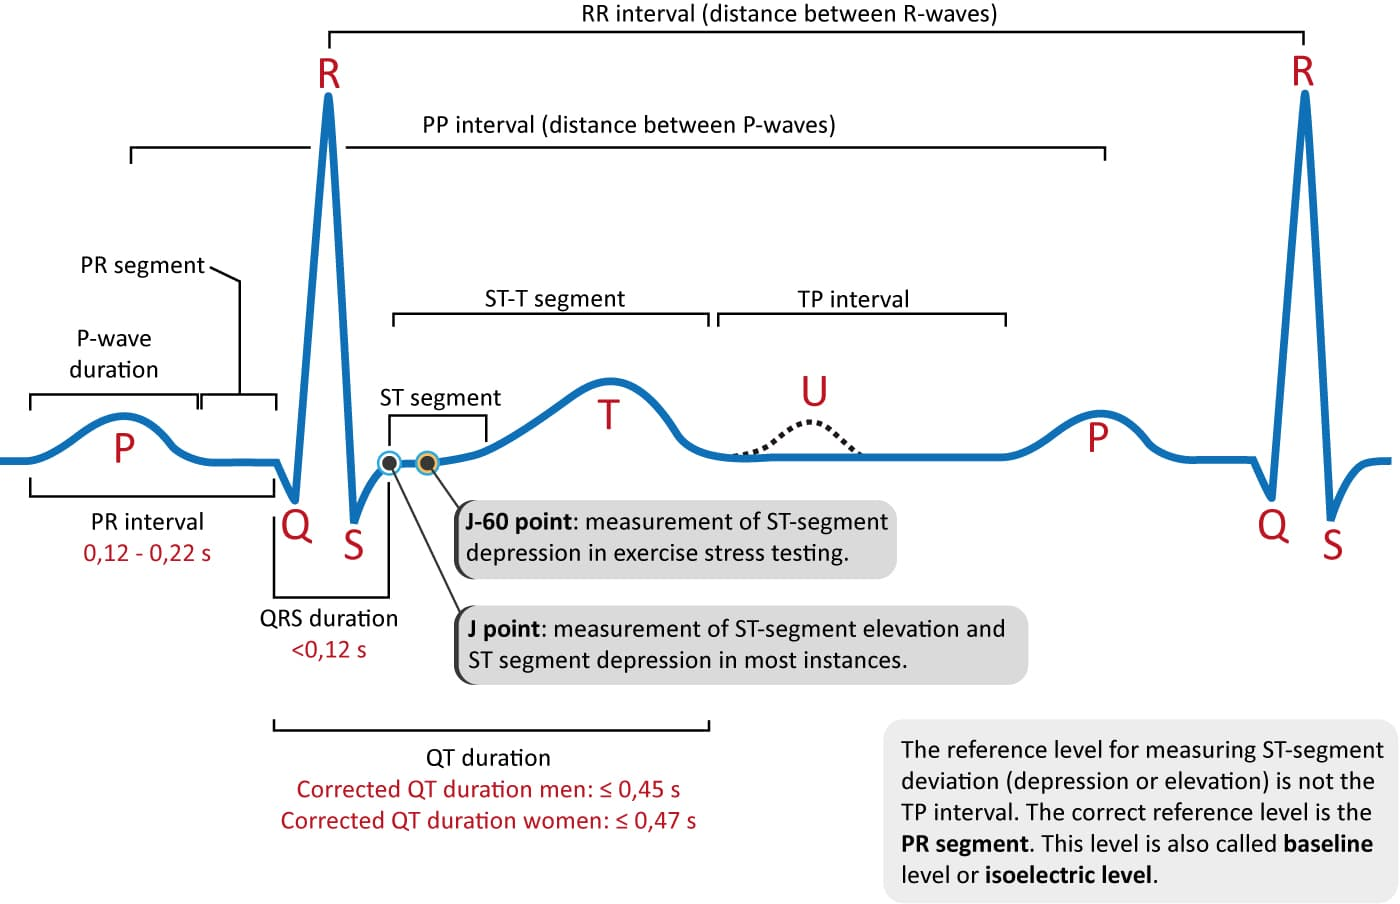

* P - wave: atrial depolarization (initiates atrial contraction)
* QRS complex: represents ventricular depolarization (initiates contraction of ventricles)
* T-wave: ventricular repolarization ( initiates ventricular relaxation)
* ST segment:  portion of the ECG from the end of the QRS complex to the beginning of the T wave. The ST segment normally remains isoelectric

**Angina**
* Type of chest pain caused by reduced blood flow to the heart
* The most common cause of reduced blood flow to the heart muscle is coronary artery disease (CAD).

* Typical/classic angina refers to substernal chest pain or discomfort that is (2) Provoked by exertion or emotional stress and (3) relieved by rest or nitroglycerine (or both).
* Atypical/probable anginal chest pain applies when 2 out of 3 criteria of classic angina are present.
* Non anginal pain -recurring pain in your chest — typically, behind your breast bone and near your heart — that is not related to your heart.
* Asymptomatic- temporary alteration in blood flow through the heart  in the absence of chest pain or the usual anginal equivalents.

**ST slope**
* Slope of the peak exercise ST segment.
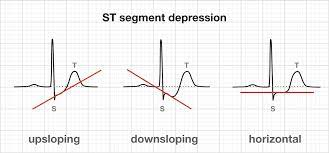

Normal ST segment during exercise slopes sharply upwards.

**Oldpeak**
* ST depression induced by exercise relative to rest


# **DATA LOADING**

## **Importing our libraries**

In [ ]:
import pandas              as pd
import numpy               as np
import seaborn             as sns
import matplotlib.pyplot   as plt
import matplotlib
import scipy as sp
# A grid layout to place subplots within a figure.
import matplotlib.gridspec as gridspec


import warnings
warnings.filterwarnings('ignore')


import pandas_profiling as pp

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.metrics import mean_squared_error,  r2_score 
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [ ]:
def settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [ ]:
settings()

Populating the interactive namespace from numpy and matplotlib


## **Loading Data**

In [ ]:
#reading csv file

df= pd.read_csv('heart.csv')

In [ ]:
#previewing top rows
df.head(4)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1


In [ ]:
#previewing bottom 4 rows
df.tail(4)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
# checking for the dimentionality of our dataset
df.shape

#our dataset has 12 features and  rows 918

(918, 12)

In [ ]:
#Checking for more information about our dataset in terms of datatypes,null etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#column names of the our dataset
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
#converting the columns to lowercase and removing  spaces
df.columns=df.columns.str.strip().str.lower()
df.columns

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')

In [ ]:
# Checking the number of unique values in the  dataset columns 



for column in df.columns:
  print(df[column].nunique())
  print(column)
  # print(results[column].unique())
  print('\n')

50
age


2
sex


4
chestpaintype


67
restingbp


222
cholesterol


2
fastingbs


3
restingecg


119
maxhr


2
exerciseangina


53
oldpeak


3
st_slope


2
heartdisease




# **DATA CLEANING**

***Missing values***

In [ ]:
#checking for missing values
df.isnull().sum()


#no null values in dataset

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

***Duplicates***

In [ ]:
# Checking for duplicates
df.duplicated().sum()

#no duplicates in our dataset

0

***Outliers***

In [ ]:
#Outliers
# checking for outliers using IQR Scores
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)).sum()

,age,chestpaintype,cholesterol,exerciseangina,fastingbs,heartdisease,maxhr,oldpeak,restingbp,restingecg,sex,st_slope
0,False,False,True,False,True,False,False,True,True,False,False,False
1,False,False,True,False,True,False,False,True,True,False,False,False
2,False,False,True,False,True,False,False,True,True,False,False,False
3,False,False,True,False,True,False,False,True,True,False,False,False
4,False,False,True,False,True,False,False,True,True,False,False,False
5,False,False,True,False,True,False,False,True,True,False,False,False
6,False,False,True,False,True,False,False,True,True,False,False,False
7,False,False,True,False,True,False,False,True,True,False,False,False
8,False,False,True,False,True,False,False,True,True,False,False,False
9,False,False,True,False,True,False,False,True,True,False,False,False


In [ ]:
df.head(1)

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0


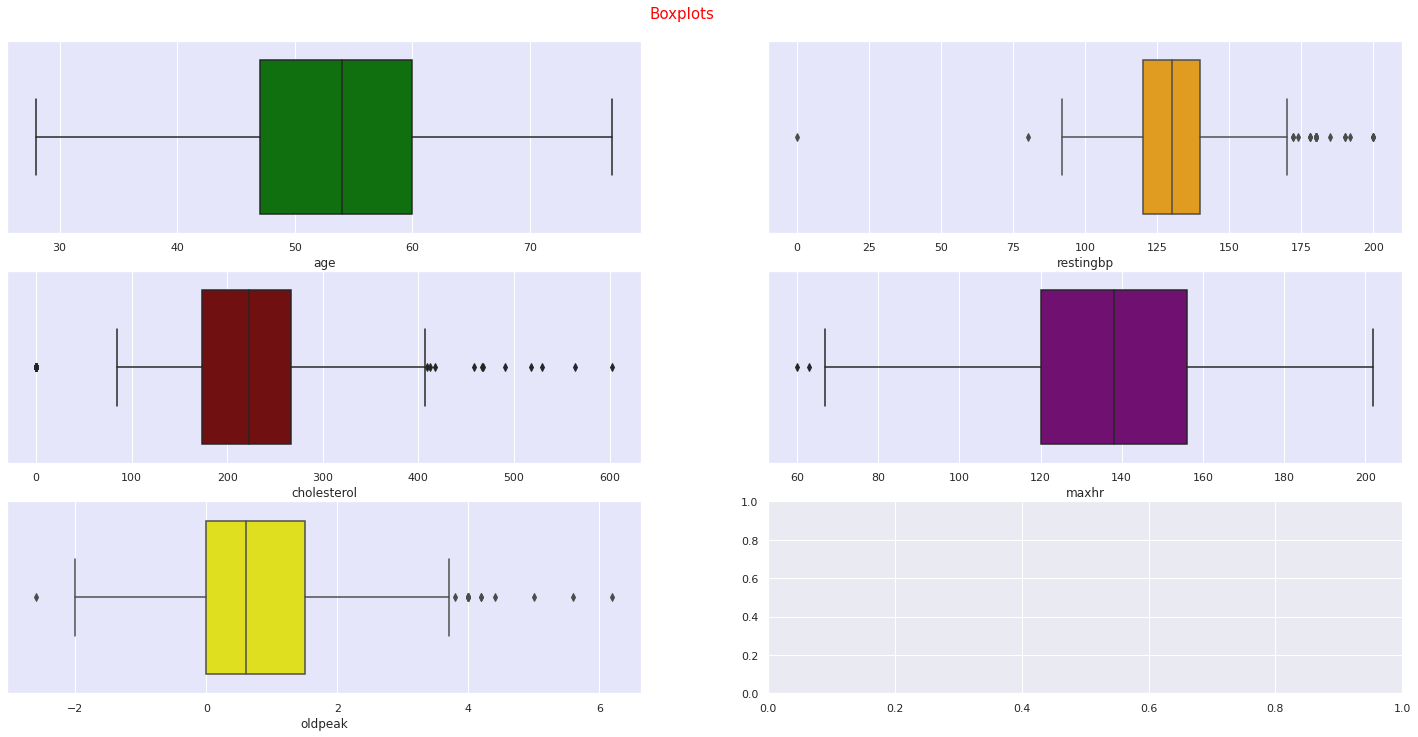

In [ ]:
#visualizing the above outiers

# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['age','restingbp','cholesterol','maxhr','oldpeak']
colors = ['green','orange','maroon','purple','yellow']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 3, ncols = 2)
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'red')
for ax, data, column, color in zip(axes.flatten(), df, col_list, colors):
  sns.boxplot(df[column], ax = ax, color = color)
  ax.set_facecolor('lavender')

We have outliers in the features oldpeak, cholesterol and restingbp, and few in max heart rate, most of which are likely due to natural variability in our data depending on the health status of an individual thus we will not be dropping most them. However, the observations with resting blood pressure as 0 and cholesterol levels as 0 call for further investigation.

In [ ]:
#resting blood pressure of 0, serum cholesterol level of 0 .. might be missing values.

In [ ]:
#We will drop the observation because blood pressure of 0 is death/near-death so 0 may be
#representing a missing value
df[df['restingbp'] == 0]

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [ ]:
#dropping observation above
df.drop(index=449, inplace=True)

In [ ]:
#serum cholesterol levels of 0 mg/dL are also highly unlikely to be valid. may be representing missing
#measurements
#We will drop the observations
len(df[df['cholesterol'] == 0])

171

In [ ]:
#dropping above observations
df = df[df['cholesterol'] != 0].copy()

In [ ]:
#checking the shape after dropping some outliers
df.shape

(746, 12)

In [ ]:
#resetting the index to be chronological
df.reset_index(inplace=True)
df.drop(columns='index', inplace=True)

In [ ]:
#previewing
print(df.head())
print(df.tail())

   age sex chestpaintype  restingbp  cholesterol  fastingbs restingecg  maxhr exerciseangina  oldpeak st_slope  heartdisease
0   40   M           ATA        140          289          0     Normal    172              N      0.0       Up             0
1   49   F           NAP        160          180          0     Normal    156              N      1.0     Flat             1
2   37   M           ATA        130          283          0         ST     98              N      0.0       Up             0
3   48   F           ASY        138          214          0     Normal    108              Y      1.5     Flat             1
4   54   M           NAP        150          195          0     Normal    122              N      0.0       Up             0
     age sex chestpaintype  restingbp  cholesterol  fastingbs restingecg  maxhr exerciseangina  oldpeak st_slope  heartdisease
741   45   M            TA        110          264          0     Normal    132              N      1.2     Flat           

In [ ]:
#checking for anomalies in categorical columns
cols = ['sex', 'chestpaintype', 'fastingbs',
       'restingecg', 'exerciseangina', 'st_slope',
       'heartdisease']
for column in cols:
  print(column)
  print(df[column].unique())
  
  
  print('\n')

#no anomalous values observed

sex
['M' 'F']


chestpaintype
['ATA' 'NAP' 'ASY' 'TA']


fastingbs
[0 1]


restingecg
['Normal' 'ST' 'LVH']


exerciseangina
['N' 'Y']


st_slope
['Up' 'Flat' 'Down']


heartdisease
[0 1]




In [ ]:
#saving our clean dataset
df.to_csv('clean-heart',index=False)

# **UNIVARIATE ANALYSIS**

In [ ]:
#general statistical summaries of the numerical variables
df.drop(columns=['fastingbs', 'heartdisease'], axis=1).describe()

,age,restingbp,cholesterol,maxhr,oldpeak
count,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,140.226542,0.901609
std,9.505888,17.282750,59.153524,24.524107,1.072861
min,28.000000,92.000000,85.000000,69.000000,-0.100000
25%,46.000000,120.000000,207.250000,122.000000,0.000000
50%,54.000000,130.000000,237.000000,140.000000,0.500000
75%,59.000000,140.000000,275.000000,160.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


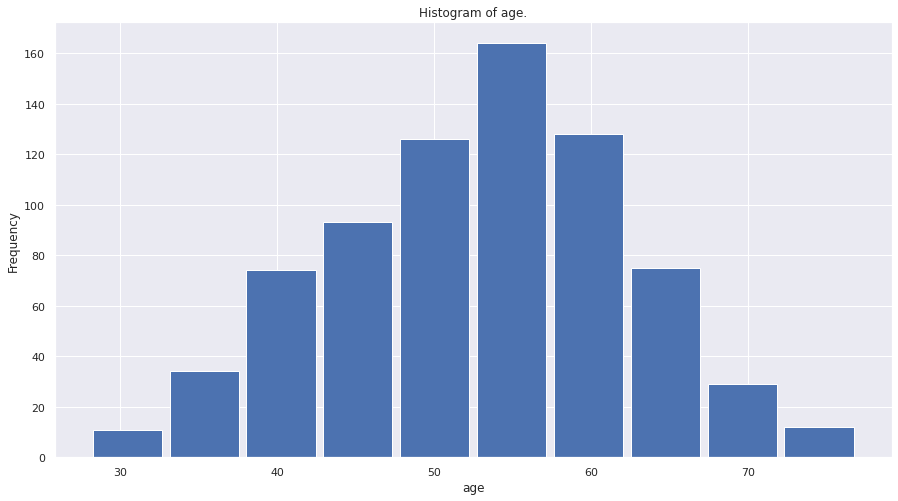

Most patients were aged between 52 and 57



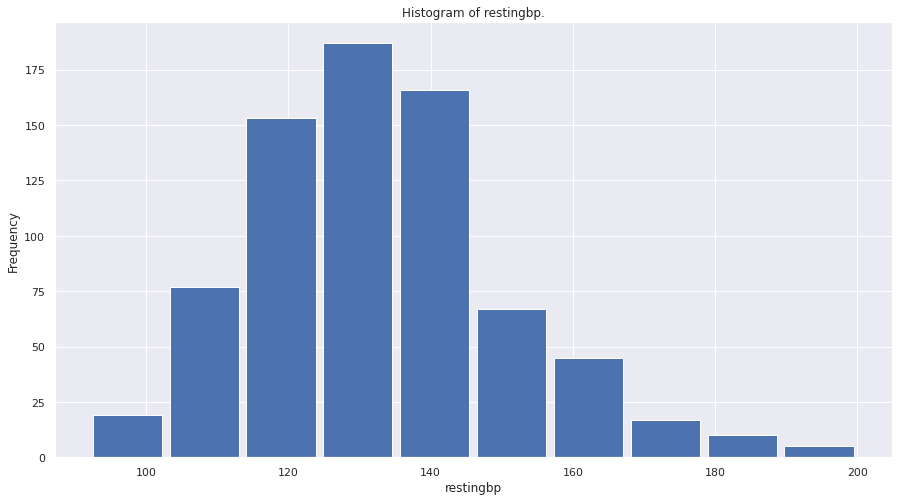

Most restingbp values fell within the range of 124.4 to 135.2



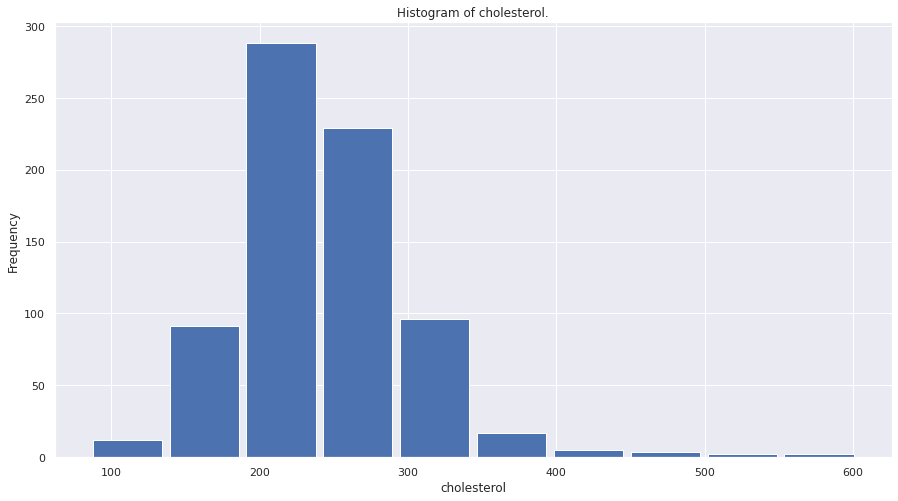

Most cholesterol values fell within the range of 188.6 to 240.4



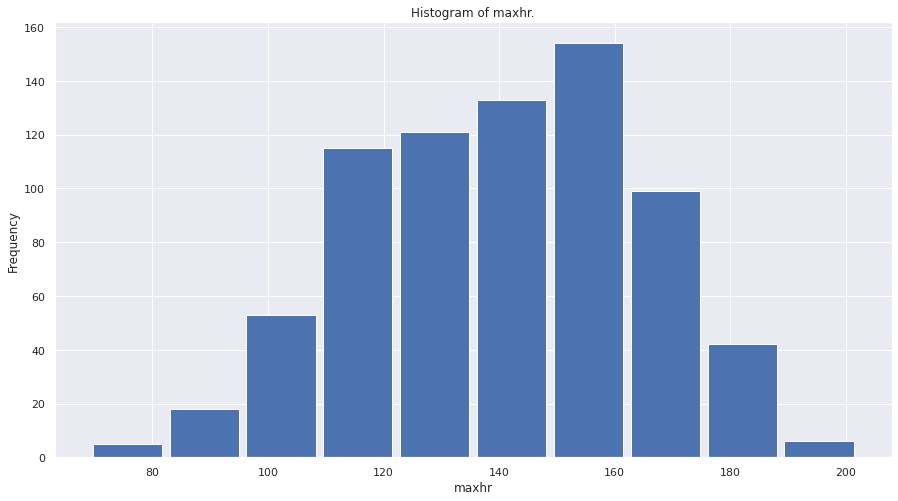

Most maxhr values fell within the range of 148.8 to 162.1



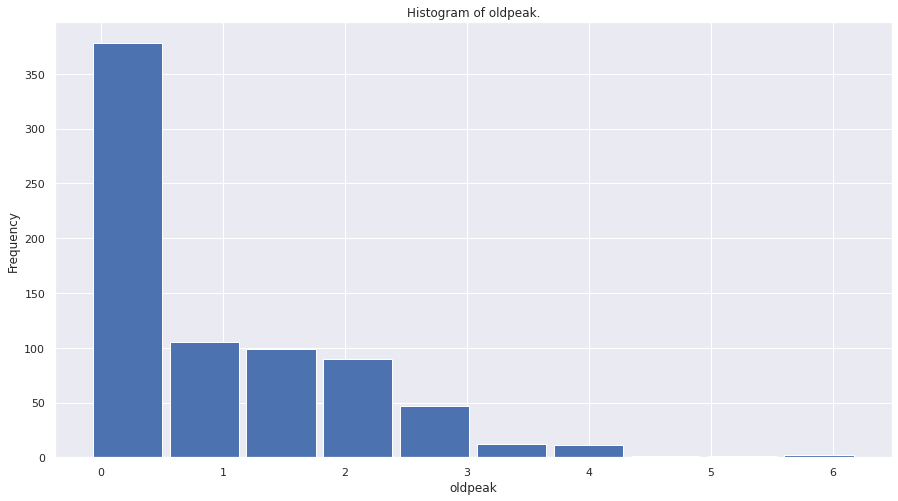

Most oldpeak values fell within the range of -0.1 to 0.53



In [ ]:
#plotting histograms for continuous variables
cols = ['age', 'restingbp', 'cholesterol', 'maxhr', 'oldpeak']
for col in cols:
  (n, bins, patches) = plt.hist(df[col], bins= 10, rwidth=0.9)

  plt.title(f'Histogram of {col}.')
  plt.xlabel(f'{col}')
  plt.ylabel('Frequency')
  plt.gcf().set_size_inches(15,8)
  plt.show()
  #creating a dataframe with the values of bin edges
  df_hist = pd.DataFrame(data=n, columns=['bin_values'])
  df_hist['left_bin_edge'] = bins[0:-1]
  df_hist
  last = {
    'bin_values': 0,
    'left_bin_edge': bins[-1]
  }
  df_hist = df_hist.append(last, ignore_index=True)
  #looping through dataframe above to identify bins with most frequency and the respective bin edges
  #to print observations below histogram 
  for i in df_hist.index:
    if df_hist.loc[i, 'bin_values'] == df_hist['bin_values'].max():
      left_edge =  df_hist.loc[i, 'left_bin_edge']
      right_lim = df_hist.loc[i+1, 'left_bin_edge']
      if col == 'age':
        print(f'Most patients were aged between { int(left_edge)} and {int(right_lim)}')

      else:
        print(f'Most {col} values fell within the range of { round(left_edge,2)} to {round(right_lim,2)}')

  print('')

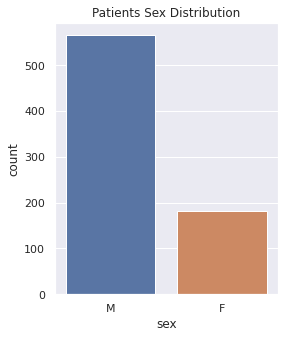

In [ ]:
#countplots of categorical: Sex distribution
plt.figure(figsize=(4, 5))
sns.countplot(df.sex, order = df.sex.value_counts().index)
plt.title("Patients Sex Distribution")
plt.show()

#from our plot, there were more males compared to females

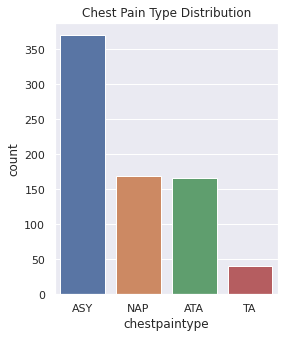

In [ ]:
#countplots of categorical: ChestPain Type Distribution
plt.figure(figsize=(4, 5))
sns.countplot(df.chestpaintype, order = df.chestpaintype.value_counts().index)
plt.title("Chest Pain Type Distribution")
plt.show()

#those tested, few people experienced Typical Angina(TA) type of Chest pain. While a Majority expereinced Asymptomatic pain(ASY) 

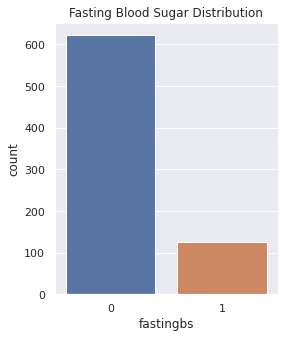

In [ ]:
#countplots of categorical: Fasting Blood Sugar
plt.figure(figsize=(4, 5))
sns.countplot(df.fastingbs, order = df.fastingbs.value_counts().index)
plt.title("Fasting Blood Sugar Distribution")
plt.show()

#most of the people tested had no/low blood sugar levels while a few had a higher levels.

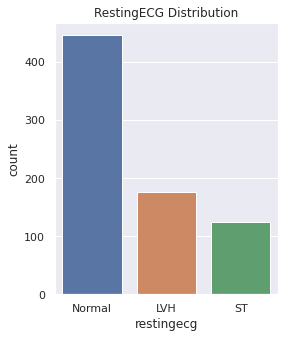

In [ ]:
#countplots of categorical: RestingECG
plt.figure(figsize=(4, 5))
sns.countplot(df.restingecg, order = df.restingecg.value_counts().index)
plt.title("RestingECG Distribution")
plt.show()

#from the plot, many people have a Normal Elctrical Activity of the heart when resting. 

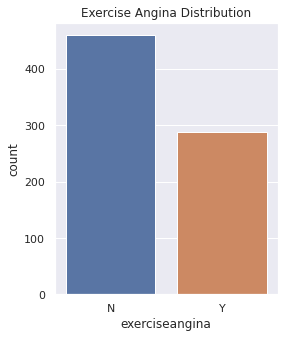

In [ ]:
#countplots of categorical: ExerciseAngina
plt.figure(figsize=(4, 5))
sns.countplot(df.exerciseangina, order = df.exerciseangina.value_counts().index)
plt.title("Exercise Angina Distribution")
plt.show()

#most people from the dataset, expereinced no pain when exercising. while a fewer number - between 200 to 300 expereinced some pain.

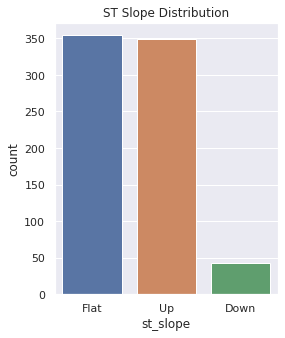

In [ ]:
#countplots of categorical: ST Slope
plt.figure(figsize=(4, 5))
sns.countplot(df.st_slope, order = df.st_slope.value_counts().index)
plt.title("ST Slope Distribution")
plt.show()

#from the ST Slope, a majority indicate a Flat slope curve, followed closely by an Up side trending curve and less than 50 people had a down slope.

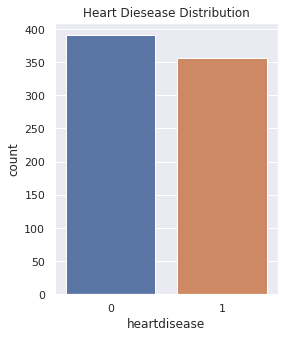

In [ ]:
#countplots of categorical: Heart Desease
plt.figure(figsize=(4, 5))
sns.countplot(df.heartdisease, order = df.heartdisease.value_counts().index)
plt.title("Heart Diesease Distribution")
plt.show()

#Now from our dataset, most of the people tested had no(0) Heart Disease.

#**BIVARIATE ANALYSIS**

In [ ]:
#target column is heart disease

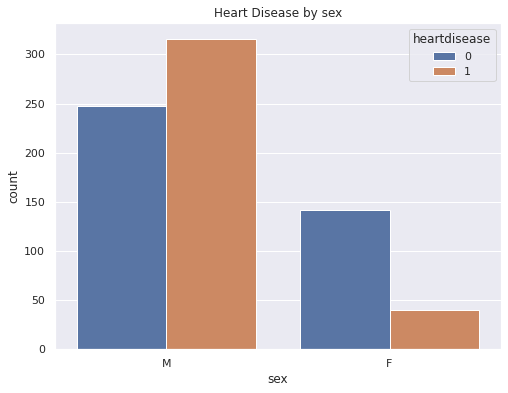

In [ ]:
#first plotting countplots of heart disease by categorical features:
#sex, ChestPainType, FastingBs, Resting ecg, Exercise angina, ST slope

#1. Sex
sns.countplot(x='sex', hue = 'heartdisease', data=df)
plt.title(f'Heart Disease by sex')
plt.gcf().set_size_inches(8, 6)
plt.show()

#most Males had heart disease, while in females, the majority had no heart disease.

most Males had heart disease, while in females, the majority had no heart disease.

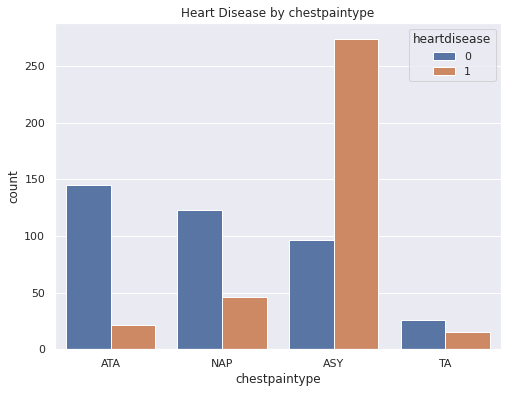

In [ ]:
#2. chestpaintype
sns.countplot(x='chestpaintype', hue = 'heartdisease', data=df)
plt.title(f'Heart Disease by chestpaintype')
plt.gcf().set_size_inches(8, 6)
plt.show()

#the plot shows that the majority experiencing asymptomatic pain had heart disease.

the majority experiencing asymptomatic pain had heart disease.

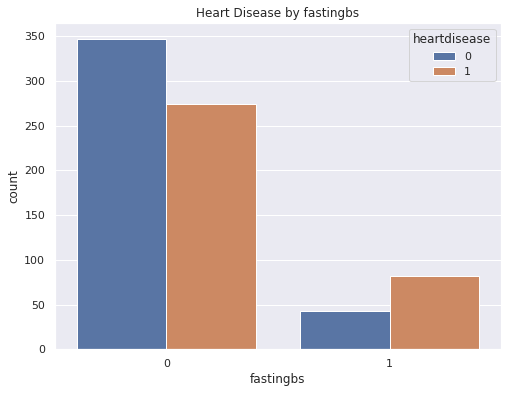

In [ ]:
#3. FastingBs
sns.countplot(x='fastingbs', hue = 'heartdisease', data=df)
plt.title(f'Heart Disease by fastingbs')
plt.gcf().set_size_inches(8, 6)
plt.show()

#1: if FastingBS > 120 mg/dl, 0: otherwise
#Majority of those with fasting blood sugar levels > 120 mg/dL had heart disease

1: if FastingBS > 120 mg/dl, 0: otherwise

Majority of those with fasting blood sugar levels > 120 mg/dL had heart disease

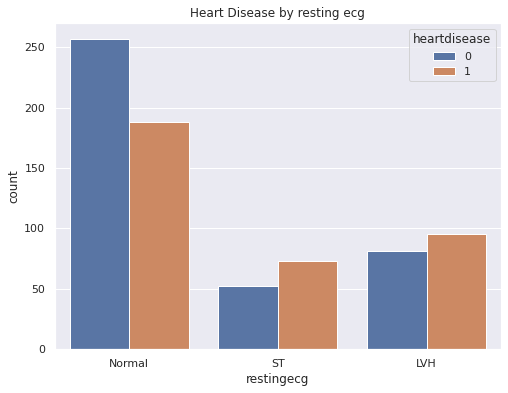

In [ ]:
#4. Resting ecg
sns.countplot(x='restingecg', hue = 'heartdisease', data=df)
plt.title(f'Heart Disease by resting ecg')
plt.gcf().set_size_inches(8, 6)
plt.show()

# Majority of those whose resting ecg results showed ST-T wave abnormality
# or probable or definite left ventricular hypertrophy had heart disease

Majority of those whose resting ecg results showed ST-T wave abnormality or probable/definite left ventricular hypertrophy had heart disease.

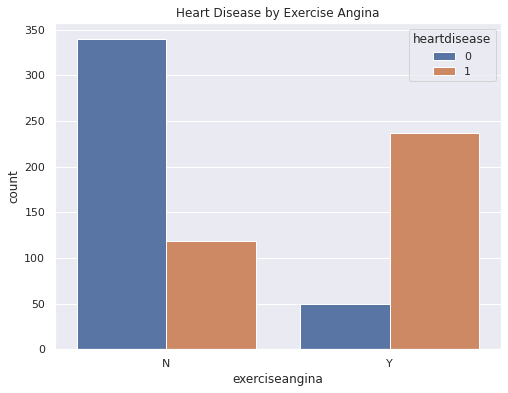

In [ ]:
#5. Exercise Angina
sns.countplot(x='exerciseangina', hue = 'heartdisease', data=df)
plt.title(f'Heart Disease by Exercise Angina')
plt.gcf().set_size_inches(8, 6)
plt.show()

#Majority of those who experiened eangina during exercise had heart disease

Majority of those who experienced angina induced by exercise had heart disease.

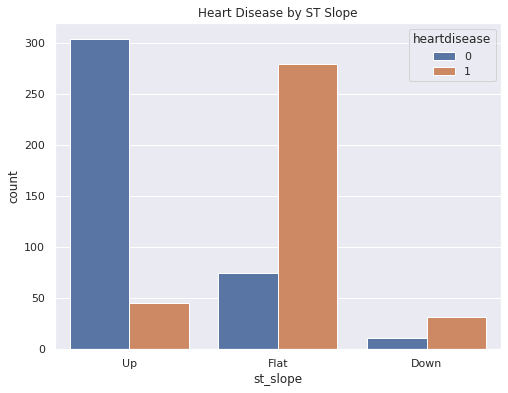

In [ ]:
#6. ST slope
sns.countplot(x='st_slope', hue = 'heartdisease', data=df)
plt.title(f'Heart Disease by ST Slope')
plt.gcf().set_size_inches(8, 6)
plt.show()

#Majority of those whose ST slope during peak exercise sloped down
#or was flat had heart disease

Majority of those whose ST slope during peak exercise sloped down or was flat had heart disease

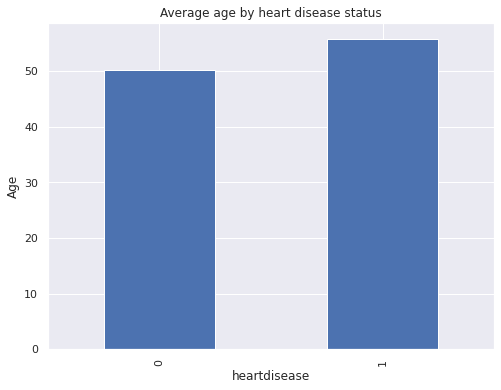

In [ ]:
#continuous
df.groupby(['heartdisease'])['age'].mean().plot.bar()
plt.title('Average age by heart disease status')
plt.ylabel('Age')
plt.gcf().set_size_inches(8, 6)
plt.show()

#the average age of those with heart disease was higher than the average age of those without heart disease

the average age of those with heart disease was higher than the average age of those without heart disease

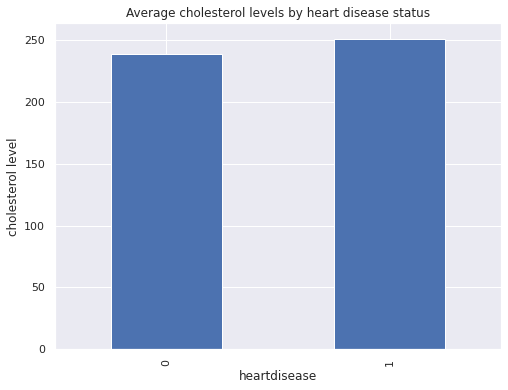

In [ ]:
df.groupby(['heartdisease'])['cholesterol'].mean().plot.bar()
plt.title('Average cholesterol levels by heart disease status')
plt.ylabel('cholesterol level')
plt.gcf().set_size_inches(8, 6)
plt.show()
#the average cholesterol levels of those with heart disease was higher than the average of those without heart disease

the average cholesterol levels of those with heart disease was higher than the average of those without heart disease

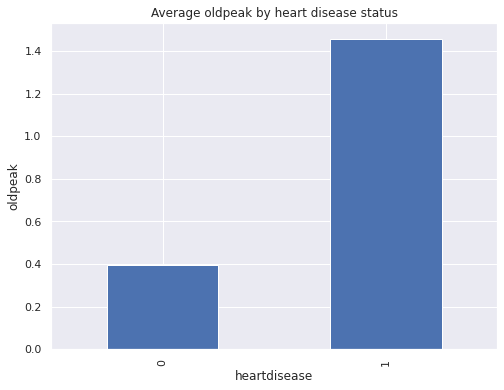

In [ ]:
df.groupby(['heartdisease'])['oldpeak'].mean().plot.bar()
plt.title('Average oldpeak by heart disease status')
plt.ylabel('oldpeak')
plt.gcf().set_size_inches(8, 6)
plt.show()
##the average old peak value (ST depression induced by exercise relative to rest) of those with heart disease was higher
# than the average of those without heart disease

The average old peak value (ST depression induced by exercise relative to rest) of those with heart disease was higher than the average of those without heart disease.

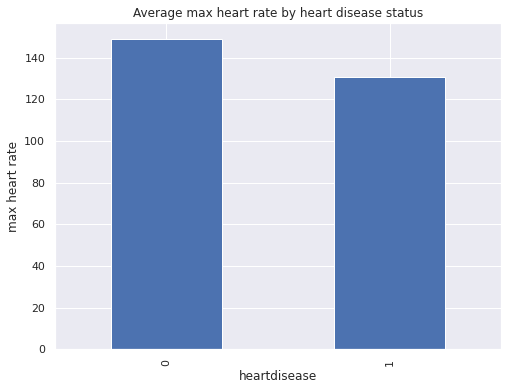

In [ ]:
df.groupby(['heartdisease'])['maxhr'].mean().plot.bar()
plt.title('Average max heart rate by heart disease status')
plt.ylabel('max heart rate')
plt.gcf().set_size_inches(8, 6)
plt.show()
#the average max heart rate achieved of those with heart disease was lower 
#than the average of those without heart disease

The average max heart rate achieved of those with heart disease was lower than the average of those without heart disease

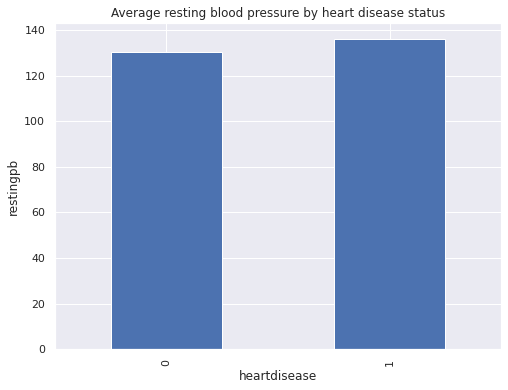

In [ ]:
df.groupby(['heartdisease'])['restingbp'].mean().plot.bar()
plt.title('Average resting blood pressure by heart disease status')
plt.ylabel('restingpb')
plt.gcf().set_size_inches(8, 6)
plt.show()
##the average resting blood pressure of those with heart disease was higher
# than the average of those without heart disease

The average resting blood pressure of those with heart disease was higher than the average of those without heart disease.

In [ ]:
# Encoding the categorical columns
#
cols=['sex', 'chestpaintype', 'restingecg', 'exerciseangina', 'st_slope']
le = LabelEncoder()
df_encoded=df.copy()
for col in cols:
  df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
# Confirming the changes

df_encoded.tail()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
741,45,1,3,110,264,0,1,132,0,1.2,1,1
742,68,1,0,144,193,1,1,141,0,3.4,1,1
743,57,1,0,130,131,0,1,115,1,1.2,1,1
744,57,0,1,130,236,0,0,174,0,0.0,1,1
745,38,1,2,138,175,0,1,173,0,0.0,2,0


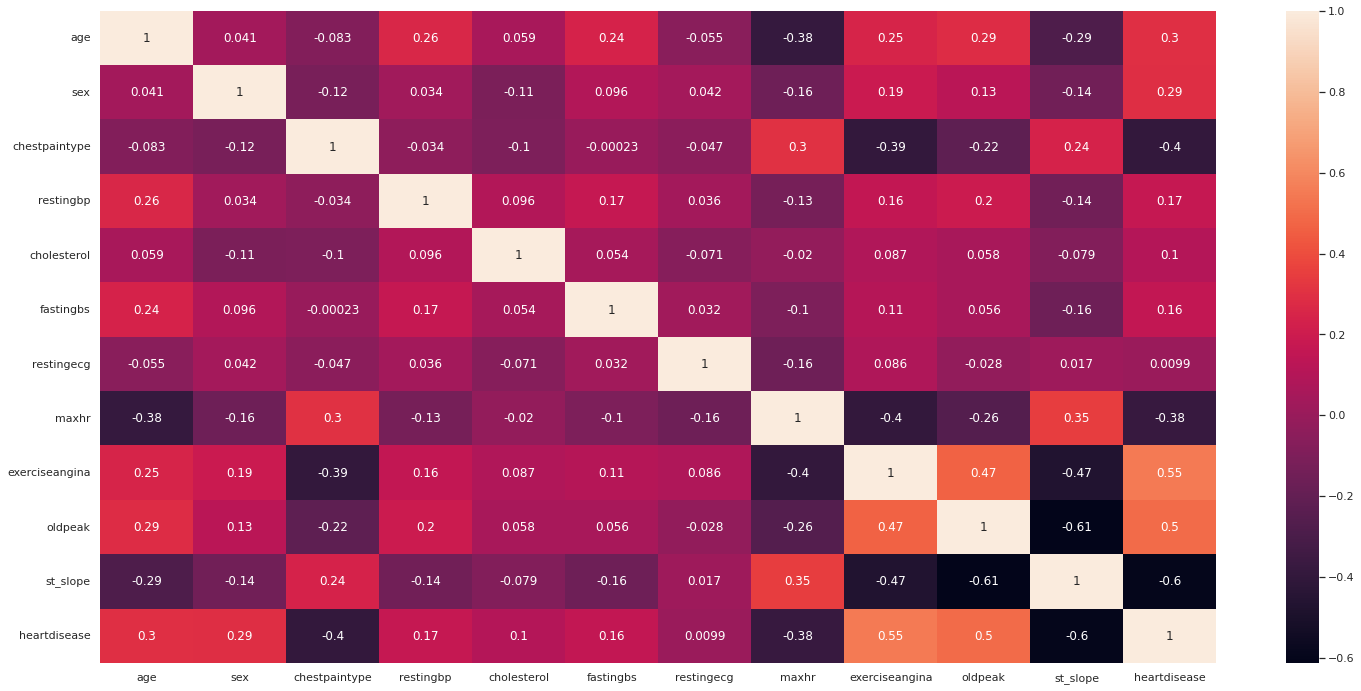

In [ ]:
#showing correlation on a heatmap

plt.figure()
sns.heatmap(df_encoded.corr(),annot=True)
plt.show()

Heart disease, the target column, appears to be most correlated to st_slope, exercise angina, oldpeak and chestpaintype in that order. Modelling will reveal more on the relationships

#**MODELLING**

In [ ]:
#importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
#target column - heart disease
#there is a class imbalance but only a slight one
df.heartdisease.value_counts()

0    390
1    356
Name: heartdisease, dtype: int64

In [ ]:
accuracies = []

## 1.Random Forest Approach

In [ ]:


# Split the independent and dependent variables

y = df_encoded['heartdisease'].values


X = df_encoded.drop(columns='heartdisease').values

#X column names
x_cols = df.drop(columns='heartdisease').columns


# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

[[98 18]
 [12 96]]


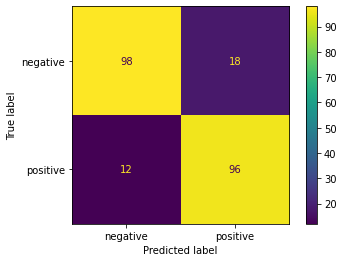

Recall:  0.889
F-1:  0.865
Accuracy:  0.866


In [ ]:
#Fitting the model

forest = RandomForestClassifier(n_estimators = 100, random_state=0, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


from sklearn import metrics

#evaluating the model
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'positive'])

plt.show()

recall = round(metrics.recall_score(y_test, y_pred), 3)
f1 = round(metrics.f1_score(y_test, y_pred), 3)
accuracy = round(metrics.accuracy_score(y_test, y_pred), 3)

accuracies.append(('First random forest: ', {
    'Recall': recall,
    'F-1': f1,
    'Accuracy': accuracy
}))
print('Recall: ', recall)
print('F-1: ', f1)
print('Accuracy: ', accuracy)



In [ ]:
for accuracy in accuracies:
  print(accuracy[0])
  print(accuracy[1])
  print('')

First random forest: 
{'Recall': 0.889, 'F-1': 0.865, 'Accuracy': 0.866}



The main interest is detecting presence of heart disease (class 1), in which case false negatives are more detrimental than false positives. Recall is therefore the most key metric to consider, and we should attempt to optimize our model for recall.

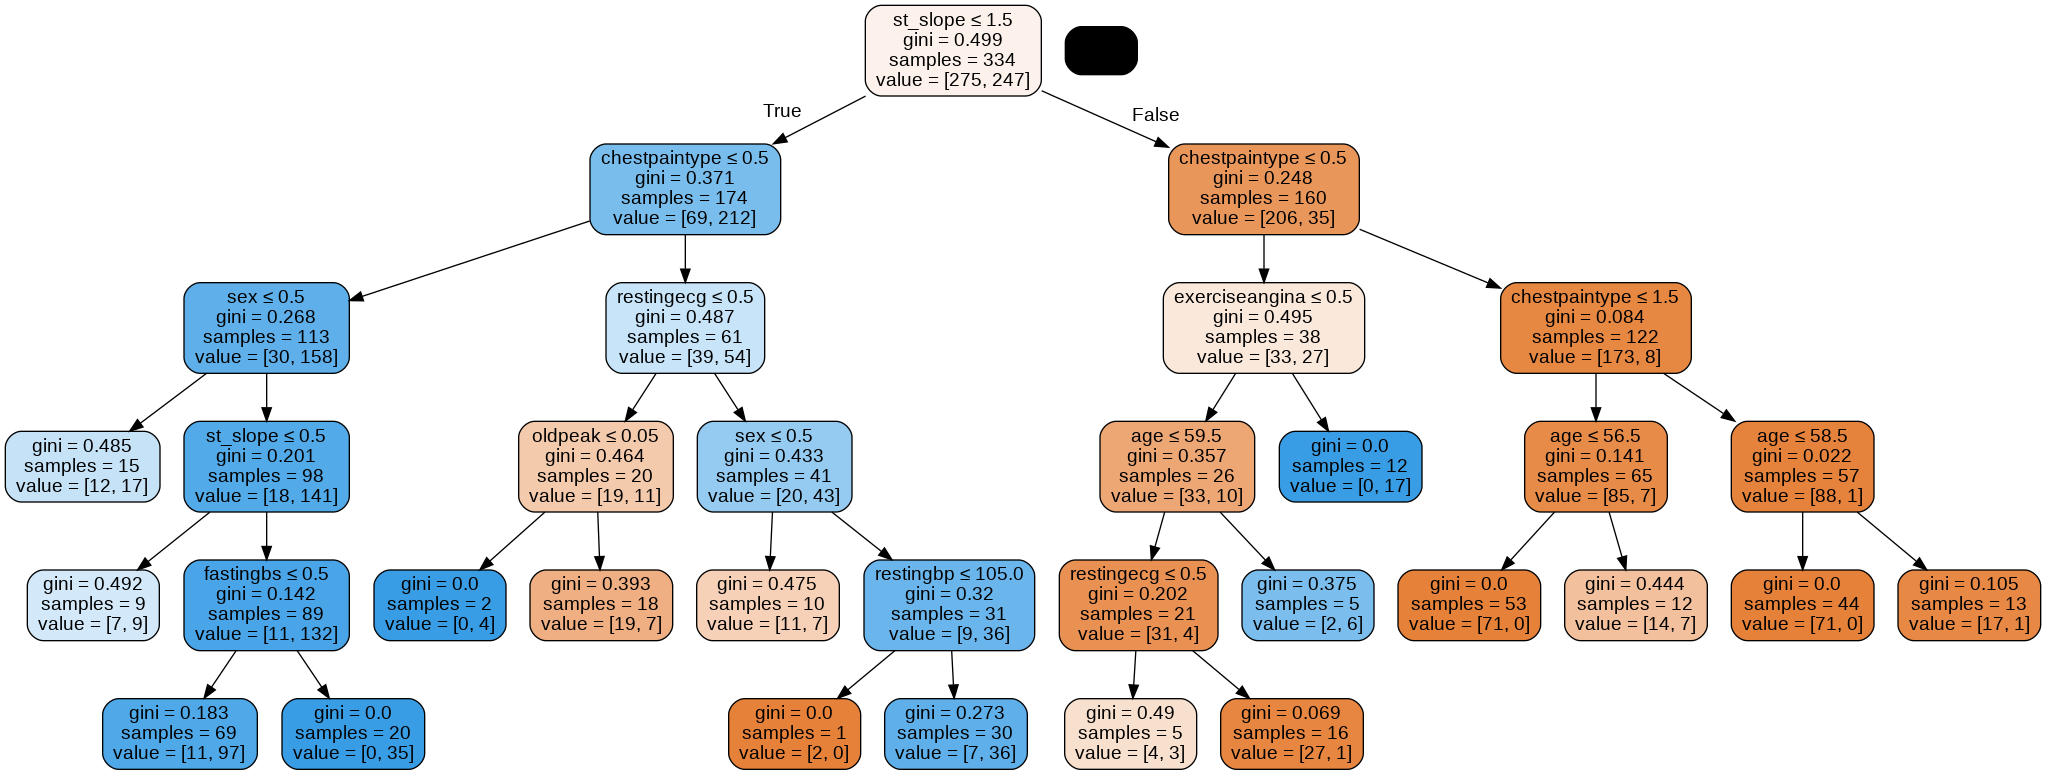

In [ ]:
#visualising the second tree of model above
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[1]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('forest.png')
Image(graph.create_png())

In [ ]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_estimators': np.arange(50, 500, 50),
              'min_samples_split': np.arange(5, 30, 5),
              'max_depth': np.arange(2,7)}
rforest = RandomForestClassifier(random_state=0)
#finding values
search = GridSearchCV(estimator=rforest,param_grid=parameters,scoring='recall')
search.fit(X_train,y_train)
print(search.best_params_)

{'max_depth': 6, 'min_samples_split': 15, 'n_estimators': 450}


[[99 17]
 [12 96]]


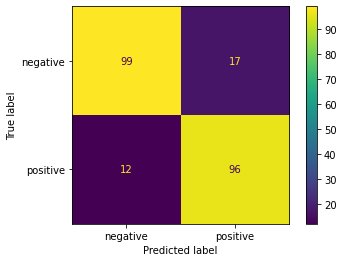

Recall:  0.889
F-1:  0.869
Accuracy:  0.871


In [ ]:
#creating model with hyperparameter values observed above and fitting the model
forest = RandomForestClassifier(n_estimators = 450, random_state=0, min_samples_split = 15, max_depth=6)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

#evaluating the model
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'positive'])

plt.show()
recall = round(metrics.recall_score(y_test, y_pred), 3)
f1 = round(metrics.f1_score(y_test, y_pred), 3)
accuracy = round(metrics.accuracy_score(y_test, y_pred), 3)

accuracies.append(('Random forest after tuning: ', {
    'Recall': recall,
    'F-1': f1,
    'Accuracy': accuracy
}))
print('Recall: ', recall)
print('F-1: ', f1)
print('Accuracy: ', accuracy)

In [ ]:

#interest is detecting presence of heart disease, where false negatives are more detrimental
for accuracy in accuracies:
  print(accuracy[0])
  print(accuracy[1])
  print('')

First random forest: 
{'Recall': 0.889, 'F-1': 0.865, 'Accuracy': 0.866}

Random forest after tuning: 
{'Recall': 0.889, 'F-1': 0.869, 'Accuracy': 0.871}



Although  F1 scores and accuracy are slightly higher, recall which is our main focus has not improved.

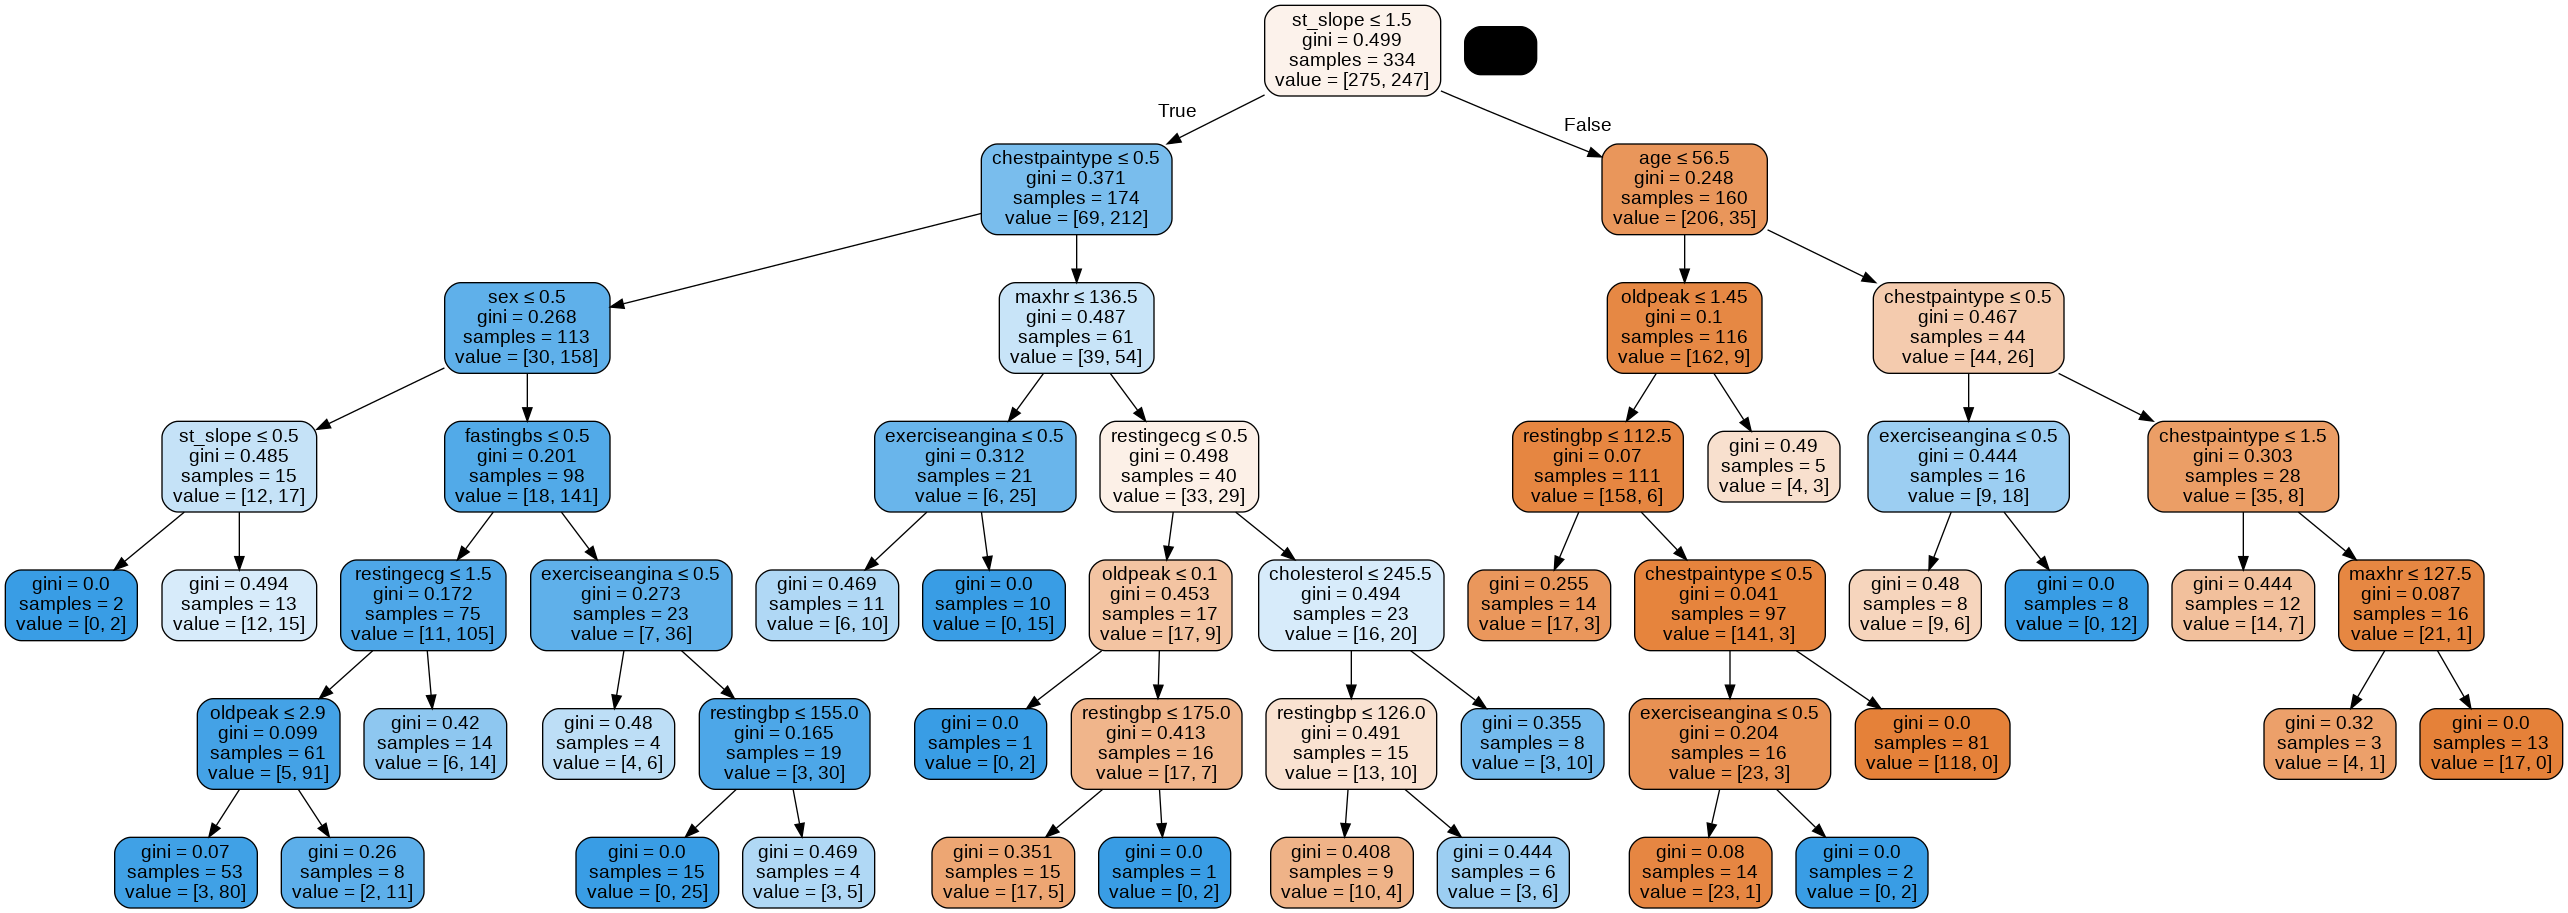

In [ ]:
#visualising the second tree of the fine-tuned hyperparameter model
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[1]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('forest.png')
Image(graph.create_png())

## 2.Gradient Boosting Approach

[[95 21]
 [14 94]]


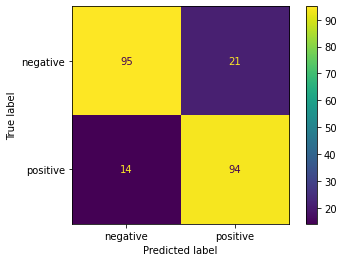

Recall:  0.87
F-1:  0.843
Accuracy:  0.844


In [ ]:
#fitting first gbc model 
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0)
gbc = gbc.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = gbc.predict(X_test)

#Evaluating the model
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'positive'])

plt.show()
recall = round(metrics.recall_score(y_test, y_pred), 3)
f1 = round(metrics.f1_score(y_test, y_pred), 3)
accuracy = round(metrics.accuracy_score(y_test, y_pred), 3)

accuracies.append(('First gradient boosting classifier(gbc): ', {
    'Recall': recall,
    'F-1': f1,
    'Accuracy': accuracy
}))
print('Recall: ', recall)
print('F-1: ', f1)
print('Accuracy: ', accuracy)

In [ ]:
for accuracy in accuracies:
  print(accuracy[0])
  print(accuracy[1])
  print('')

First random forest: 
{'Recall': 0.889, 'F-1': 0.865, 'Accuracy': 0.866}

Random forest after tuning: 
{'Recall': 0.889, 'F-1': 0.869, 'Accuracy': 0.871}

First gradient boosting classifier(gbc): 
{'Recall': 0.87, 'F-1': 0.843, 'Accuracy': 0.844}



Before tuning the hyperparameters, it can be observed that the first gradient boosting classifier generally performs worse than the random forests.

In [ ]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_estimators': np.arange(100, 500, 100),
              'learning_rate': [0.01, 0.1, 1],
              'max_depth': np.arange(2,7)}
gdbc = GradientBoostingClassifier(random_state=0)
#finding values
search = GridSearchCV(estimator=gdbc,param_grid=parameters,scoring='recall')
search.fit(X_train,y_train)
print(search.best_params_)

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 300}


[[95 21]
 [10 98]]


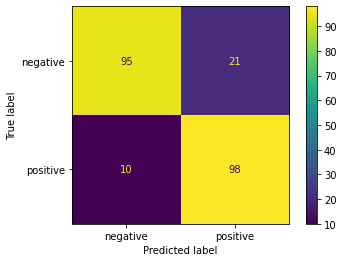

Recall:  0.907
F-1:  0.863
Accuracy:  0.862


In [ ]:
#creating a model with the tuned hyperparameters identified above and fitting the model
gbc = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, max_depth=2, random_state=0)
gbc = gbc.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = gbc.predict(X_test)

#Evaluating the model
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'positive'])

plt.show()
recall = round(metrics.recall_score(y_test, y_pred), 3)
f1 = round(metrics.f1_score(y_test, y_pred), 3)
accuracy = round(metrics.accuracy_score(y_test, y_pred), 3)

accuracies.append(('Gbc after tuning hyperparams: ', {
    'Recall': recall,
    'F-1': f1,
    'Accuracy': accuracy
}))
print('Recall: ', recall)
print('F-1: ', f1)
print('Accuracy: ', accuracy)

In [ ]:
for accuracy in accuracies:
  print(accuracy[0])
  print(accuracy[1])
  print('')

First random forest: 
{'Recall': 0.889, 'F-1': 0.865, 'Accuracy': 0.866}

Random forest after tuning: 
{'Recall': 0.889, 'F-1': 0.869, 'Accuracy': 0.871}

First gradient boosting classifier(gbc): 
{'Recall': 0.87, 'F-1': 0.843, 'Accuracy': 0.844}

Gbc after tuning hyperparams: 
{'Recall': 0.907, 'F-1': 0.863, 'Accuracy': 0.862}



After tuning the hyperparameters, it can be observed that the best recall score so far is obtained. This is key, as we are trying to optimize the model for recall.

### Feature importance

Feature importance will be identified using the best tree-based model identified so far (gradient boosting classifier with tuned hyperparameters - 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 300)

Variable: st_slope, Importance: 0.52
Variable: chestpaintype, Importance: 0.19
Variable: exerciseangina, Importance: 0.14
Variable: sex, Importance: 0.05
Variable: oldpeak, Importance: 0.04
Variable: restingbp, Importance: 0.02
Variable: maxhr, Importance: 0.02
Variable: age, Importance: 0.01
Variable: restingecg, Importance: 0.01
Variable: cholesterol, Importance: 0.0
Variable: fastingbs, Importance: 0.0


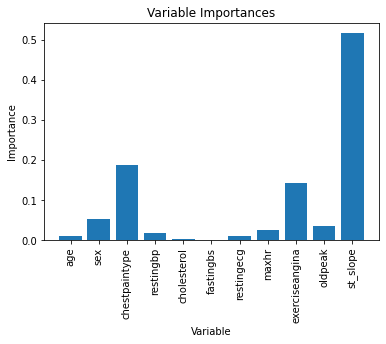

In [ ]:
# List of tuples with variable and importance using the gbc tuned model (the best recall)
importances = gbc.feature_importances_
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_cols, importances)]

#sorting the values in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Printing out the feature and importances 
for feat, signif in feature_importances:
  print(f'Variable: {feat}, Importance: {signif}') 

# Making a bar chart
plt.bar(x_cols, importances) 
# Tick labels for x axis
plt.xticks(rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables

y = df_encoded['heartdisease'].values

#selecting top 3 most important features
X = df_encoded[['st_slope', 'chestpaintype', 'exerciseangina']].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

[[ 88  28]
 [  8 100]]


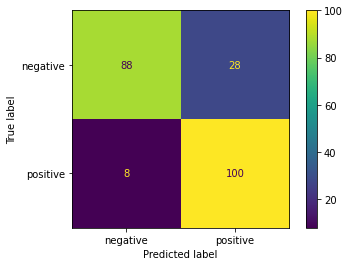

Recall:  0.926
F-1:  0.847
Accuracy:  0.839


In [ ]:
#creating a model with the tuned hyperparameters, and fitting the model with top 3 features selected above, 
gbc = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, max_depth=2, random_state=0)
gbc = gbc.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = gbc.predict(X_test)

#Evaluating the model
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'positive'])

plt.show()

recall = round(metrics.recall_score(y_test, y_pred), 3)
f1 = round(metrics.f1_score(y_test, y_pred), 3)
accuracy = round(metrics.accuracy_score(y_test, y_pred), 3)

accuracies.append(('Gbc after tuning hyperparams, using select features: ', {
    'Recall': recall,
    'F-1': f1,
    'Accuracy': accuracy
}))
print('Recall: ', recall)
print('F-1: ', f1)
print('Accuracy: ', accuracy)

In [ ]:
for accuracy in accuracies:
  print(accuracy[0])
  print(accuracy[1])
  print('')

First random forest: 
{'Recall': 0.889, 'F-1': 0.865, 'Accuracy': 0.866}

Random forest after tuning: 
{'Recall': 0.889, 'F-1': 0.869, 'Accuracy': 0.871}

First gradient boosting classifier(gbc): 
{'Recall': 0.87, 'F-1': 0.843, 'Accuracy': 0.844}

Gbc after tuning hyperparams: 
{'Recall': 0.907, 'F-1': 0.863, 'Accuracy': 0.862}

Gbc after tuning hyperparams, using select features: 
{'Recall': 0.926, 'F-1': 0.847, 'Accuracy': 0.839}



When using the tuned hyperparameters we obtained and the top three most important features ('st_slope', 'chestpaintype', 'exerciseangina'), the highest recall so far was obtained - 0.926. Although the f-1 and accuracy scores are slightly lower than some of the other tree-based models, optimizing recall was of more importance when it comes to detecting heart disease (but still having an acceptable f-1 score), so this is the best model for our case.

## 3.SVM Approach

After exploring random forests and gradient boosting classifiers, we want to test recall obtained when using support vector machines for classification.

The features will be scaled

#### Linear kernel

In [ ]:
#separating features and target
y = df_encoded['heartdisease']


X = df_encoded.drop(columns='heartdisease')

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


#X column names
x_cols = df.drop(columns='heartdisease').columns

#scaling the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

[[101  15]
 [ 15  93]]


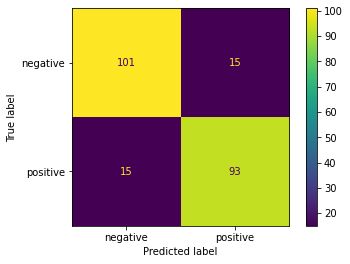

Recall:  0.861
F-1:  0.861
Accuracy:  0.866


In [ ]:
from sklearn.svm import SVC

# Fit the model. 
svc = SVC(kernel= 'linear')
model = svc.fit(X_train,y_train)

# making prediction
y_pred = model.predict(X_test)

#Evaluating the model
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'positive'])

plt.show()

recall = round(metrics.recall_score(y_test, y_pred), 3)
f1 = round(metrics.f1_score(y_test, y_pred), 3)
accuracy = round(metrics.accuracy_score(y_test, y_pred), 3)

accuracies.append(('SVM Linear kernel 1: ', {
    'Recall': recall,
    'F-1': f1,
    'Accuracy': accuracy
}))
print('Recall: ', recall)
print('F-1: ', f1)
print('Accuracy: ', accuracy)

In [ ]:
for accuracy in accuracies:
  print(accuracy[0])
  print(accuracy[1])
  print('')

First random forest: 
{'Recall': 0.889, 'F-1': 0.865, 'Accuracy': 0.866}

Random forest after tuning: 
{'Recall': 0.889, 'F-1': 0.869, 'Accuracy': 0.871}

First gradient boosting classifier(gbc): 
{'Recall': 0.87, 'F-1': 0.843, 'Accuracy': 0.844}

Gbc after tuning hyperparams: 
{'Recall': 0.907, 'F-1': 0.863, 'Accuracy': 0.862}

Gbc after tuning hyperparams, using select features: 
{'Recall': 0.926, 'F-1': 0.847, 'Accuracy': 0.839}

SVM Linear kernel 1: 
{'Recall': 0.861, 'F-1': 0.861, 'Accuracy': 0.866}



As can be observed, the recall of this model is still lower than the highest identified by gradient boosting.

In [ ]:
#tuning parameters

parameters = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]
            }
svct = SVC(kernel= 'linear')
#finding values
search = GridSearchCV(estimator=svct,param_grid=parameters,scoring='recall')
search.fit(X_train,y_train)
print(search.best_params_)

{'C': 0.1}


[[101  15]
 [ 15  93]]


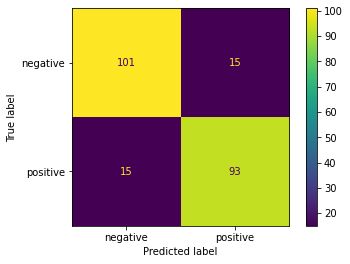

Recall:  0.861
F-1:  0.861
Accuracy:  0.866


In [ ]:
# Fit the model with tuned C parameter
svc = SVC(kernel= 'linear', C = 0.1)
model = svc.fit(X_train,y_train)

# making prediction
y_pred = model.predict(X_test)


#Evaluating the model
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'positive'])

plt.show()

recall = round(metrics.recall_score(y_test, y_pred), 3)
f1 = round(metrics.f1_score(y_test, y_pred), 3)
accuracy = round(metrics.accuracy_score(y_test, y_pred), 3)

accuracies.append(('SVM linear kernel after tuning hyperparams: ', {
    'Recall': recall,
    'F-1': f1,
    'Accuracy': accuracy
}))
print('Recall: ', recall)
print('F-1: ', f1)
print('Accuracy: ', accuracy)

In [ ]:
for accuracy in accuracies:
  print(accuracy[0])
  print(accuracy[1])
  print('')

First random forest: 
{'Recall': 0.889, 'F-1': 0.865, 'Accuracy': 0.866}

Random forest after tuning: 
{'Recall': 0.889, 'F-1': 0.869, 'Accuracy': 0.871}

First gradient boosting classifier(gbc): 
{'Recall': 0.87, 'F-1': 0.843, 'Accuracy': 0.844}

Gbc after tuning hyperparams: 
{'Recall': 0.907, 'F-1': 0.863, 'Accuracy': 0.862}

Gbc after tuning hyperparams, using select features: 
{'Recall': 0.926, 'F-1': 0.847, 'Accuracy': 0.839}

SVM Linear kernel 1: 
{'Recall': 0.861, 'F-1': 0.861, 'Accuracy': 0.866}

SVM linear kernel after tuning hyperparams: 
{'Recall': 0.861, 'F-1': 0.861, 'Accuracy': 0.866}



Upon tuning C parameter, scores remain the same as before tuning. The recall therefore still lower than best identified by gradient boosting.

#### Polynomial kernel

[[102  14]
 [ 34  74]]


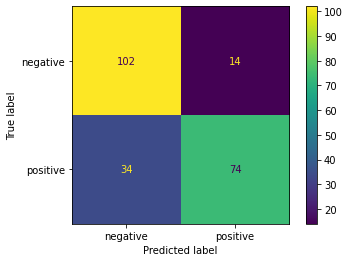

Recall:  0.685
F-1:  0.755
Accuracy:  0.786


In [ ]:
#polynomial kernel

# Building the model 
polyclassifier = SVC(kernel='poly',degree=2)
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

# making prediction
y_pred = polyclassifier.predict(X_test)

#Evaluating the model
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'positive'])

plt.show()

recall = round(metrics.recall_score(y_test, y_pred), 3)
f1 = round(metrics.f1_score(y_test, y_pred), 3)
accuracy = round(metrics.accuracy_score(y_test, y_pred), 3)

accuracies.append(('SVM polynomial kernel 1: ', {
    'Recall': recall,
    'F-1': f1,
    'Accuracy': accuracy
}))
print('Recall: ', recall)
print('F-1: ', f1)
print('Accuracy: ', accuracy)

In [ ]:
for accuracy in accuracies:
  print(accuracy[0])
  print(accuracy[1])
  print('')

First random forest: 
{'Recall': 0.889, 'F-1': 0.865, 'Accuracy': 0.866}

Random forest after tuning: 
{'Recall': 0.889, 'F-1': 0.869, 'Accuracy': 0.871}

First gradient boosting classifier(gbc): 
{'Recall': 0.87, 'F-1': 0.843, 'Accuracy': 0.844}

Gbc after tuning hyperparams: 
{'Recall': 0.907, 'F-1': 0.863, 'Accuracy': 0.862}

Gbc after tuning hyperparams, using select features: 
{'Recall': 0.926, 'F-1': 0.847, 'Accuracy': 0.839}

SVM Linear kernel 1: 
{'Recall': 0.861, 'F-1': 0.861, 'Accuracy': 0.866}

SVM linear kernel after tuning hyperparams: 
{'Recall': 0.861, 'F-1': 0.861, 'Accuracy': 0.866}

SVM polynomial kernel 1: 
{'Recall': 0.685, 'F-1': 0.755, 'Accuracy': 0.786}



The first polynomial kernel model has metric scores significantly lower than all other models so far.

In [ ]:
#tuning parameters

parameters = {'degree': np.arange(2,7)
            }
svct = SVC(kernel= 'poly')
#finding values
search = GridSearchCV(estimator=svct,param_grid=parameters,scoring='recall')
search.fit(X_train,y_train)
print(search.best_params_)

{'degree': 3}


[[101  15]
 [ 21  87]]


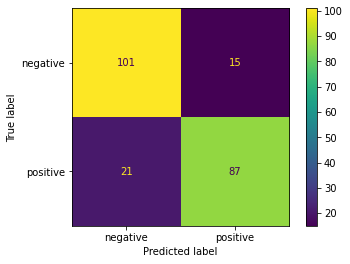

Recall:  0.806
F-1:  0.829
Accuracy:  0.839


In [ ]:
#Testing with a different degree hyperparameter value

# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

# making prediction
y_pred = polyclassifier.predict(X_test)
#Evaluating the model
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'positive'])

plt.show()

recall = round(metrics.recall_score(y_test, y_pred), 3)
f1 = round(metrics.f1_score(y_test, y_pred), 3)
accuracy = round(metrics.accuracy_score(y_test, y_pred), 3)

accuracies.append(('SVM polynomial kernel after tuning hyperparams: ', {
    'Recall': recall,
    'F-1': f1,
    'Accuracy': accuracy
}))
print('Recall: ', recall)
print('F-1: ', f1)
print('Accuracy: ', accuracy)

In [ ]:
for accuracy in accuracies:
  print(accuracy[0])
  print(accuracy[1])
  print('')

First random forest: 
{'Recall': 0.889, 'F-1': 0.865, 'Accuracy': 0.866}

Random forest after tuning: 
{'Recall': 0.889, 'F-1': 0.869, 'Accuracy': 0.871}

First gradient boosting classifier(gbc): 
{'Recall': 0.87, 'F-1': 0.843, 'Accuracy': 0.844}

Gbc after tuning hyperparams: 
{'Recall': 0.907, 'F-1': 0.863, 'Accuracy': 0.862}

Gbc after tuning hyperparams, using select features: 
{'Recall': 0.926, 'F-1': 0.847, 'Accuracy': 0.839}

SVM Linear kernel 1: 
{'Recall': 0.861, 'F-1': 0.861, 'Accuracy': 0.866}

SVM linear kernel after tuning hyperparams: 
{'Recall': 0.861, 'F-1': 0.861, 'Accuracy': 0.866}

SVM polynomial kernel 1: 
{'Recall': 0.685, 'F-1': 0.755, 'Accuracy': 0.786}

SVM polynomial kernel after tuning hyperparams: 
{'Recall': 0.806, 'F-1': 0.829, 'Accuracy': 0.839}



After tuning the degree hyperparameter, the polynomial kernel SVM performs much better than the first polynomial one, but the recall obtained (0.806) is still much lower than the best identified(0.926 - gradient boosting)

#### Sigmoid kernel

[[99 17]
 [17 91]]


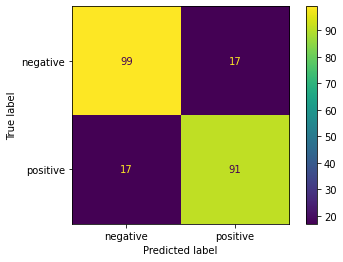

Recall:  0.843
F-1:  0.843
Accuracy:  0.848


In [ ]:
#sigmoidkernel

# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

# making prediction
y_pred = sigclassifier.predict(X_test)
#Evaluating the model
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'positive'])

plt.show()

recall = round(metrics.recall_score(y_test, y_pred), 3)
f1 = round(metrics.f1_score(y_test, y_pred), 3)
accuracy = round(metrics.accuracy_score(y_test, y_pred), 3)

accuracies.append(('SVM sigmoid kernel 1: ', {
    'Recall': recall,
    'F-1': f1,
    'Accuracy': accuracy
}))
print('Recall: ', recall)
print('F-1: ', f1)
print('Accuracy: ', accuracy)

In [ ]:
for accuracy in accuracies:
  print(accuracy[0])
  print(accuracy[1])
  print('')

First random forest: 
{'Recall': 0.889, 'F-1': 0.865, 'Accuracy': 0.866}

Random forest after tuning: 
{'Recall': 0.889, 'F-1': 0.869, 'Accuracy': 0.871}

First gradient boosting classifier(gbc): 
{'Recall': 0.87, 'F-1': 0.843, 'Accuracy': 0.844}

Gbc after tuning hyperparams: 
{'Recall': 0.907, 'F-1': 0.863, 'Accuracy': 0.862}

Gbc after tuning hyperparams, using select features: 
{'Recall': 0.926, 'F-1': 0.847, 'Accuracy': 0.839}

SVM Linear kernel 1: 
{'Recall': 0.861, 'F-1': 0.861, 'Accuracy': 0.866}

SVM linear kernel after tuning hyperparams: 
{'Recall': 0.861, 'F-1': 0.861, 'Accuracy': 0.866}

SVM polynomial kernel 1: 
{'Recall': 0.685, 'F-1': 0.755, 'Accuracy': 0.786}

SVM polynomial kernel after tuning hyperparams: 
{'Recall': 0.806, 'F-1': 0.829, 'Accuracy': 0.839}

SVM sigmoid kernel 1: 
{'Recall': 0.843, 'F-1': 0.843, 'Accuracy': 0.848}



The recall (0.843) obtained is lower than the best identified (0.926)

In [ ]:
#tuning parameters

parameters = {
              'C': [0.1, 1, 10, 100],
              
            }
svcs = SVC(kernel= 'sigmoid')
#finding values
search = GridSearchCV(estimator=svcs,param_grid=parameters,scoring='recall')
search.fit(X_train,y_train)
print(search.best_params_)

{'C': 0.1}


[[103  13]
 [ 17  91]]


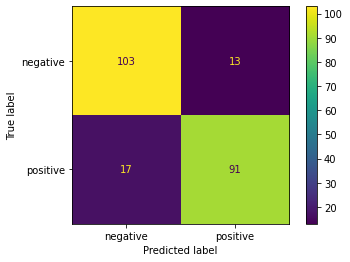

Recall:  0.843
F-1:  0.858
Accuracy:  0.866


In [ ]:
#sigmoidkernel

# Building the model 
sigclassifier = SVC(kernel='sigmoid', C=0.1)
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

# making prediction
y_pred = sigclassifier.predict(X_test)
#Evaluating the model
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'positive'])

plt.show()

recall = round(metrics.recall_score(y_test, y_pred), 3)
f1 = round(metrics.f1_score(y_test, y_pred), 3)
accuracy = round(metrics.accuracy_score(y_test, y_pred), 3)

accuracies.append(('SVM sigmoid kernel after tuning hyperparams: ', {
    'Recall': recall,
    'F-1': f1,
    'Accuracy': accuracy
}))
print('Recall: ', recall)
print('F-1: ', f1)
print('Accuracy: ', accuracy)

In [ ]:
for accuracy in accuracies:
  print(accuracy[0])
  print(accuracy[1])
  print('')

First random forest: 
{'Recall': 0.889, 'F-1': 0.865, 'Accuracy': 0.866}

Random forest after tuning: 
{'Recall': 0.889, 'F-1': 0.869, 'Accuracy': 0.871}

First gradient boosting classifier(gbc): 
{'Recall': 0.87, 'F-1': 0.843, 'Accuracy': 0.844}

Gbc after tuning hyperparams: 
{'Recall': 0.907, 'F-1': 0.863, 'Accuracy': 0.862}

Gbc after tuning hyperparams, using select features: 
{'Recall': 0.926, 'F-1': 0.847, 'Accuracy': 0.839}

SVM Linear kernel 1: 
{'Recall': 0.861, 'F-1': 0.861, 'Accuracy': 0.866}

SVM linear kernel after tuning hyperparams: 
{'Recall': 0.861, 'F-1': 0.861, 'Accuracy': 0.866}

SVM polynomial kernel 1: 
{'Recall': 0.685, 'F-1': 0.755, 'Accuracy': 0.786}

SVM polynomial kernel after tuning hyperparams: 
{'Recall': 0.806, 'F-1': 0.829, 'Accuracy': 0.839}

SVM sigmoid kernel 1: 
{'Recall': 0.843, 'F-1': 0.843, 'Accuracy': 0.848}

SVM sigmoid kernel after tuning hyperparams: 
{'Recall': 0.843, 'F-1': 0.858, 'Accuracy': 0.866}



After tuning, the sigmoid kernel svm performs better than before tuning in terms of f-1 and accuracy, but recall which is our main metric of interest doesnt improve and is still lower (0.843) than the gradient boosting (0.926).

#### RBF kernel

[[98 18]
 [14 94]]


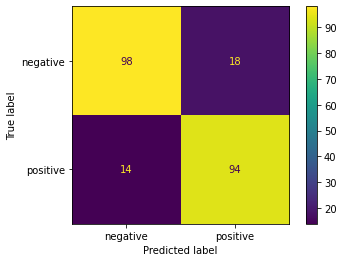

Recall:  0.87
F-1:  0.855
Accuracy:  0.857


In [ ]:
#rbf
#rbf kernel

# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

# making prediction
y_pred = rbfclassifier.predict(X_test)
#Evaluating the model
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'positive'])

plt.show()

recall = round(metrics.recall_score(y_test, y_pred), 3)
f1 = round(metrics.f1_score(y_test, y_pred), 3)
accuracy = round(metrics.accuracy_score(y_test, y_pred), 3)

accuracies.append(('SVM rbf kernel 1: ', {
    'Recall': recall,
    'F-1': f1,
    'Accuracy': accuracy
}))
print('Recall: ', recall)
print('F-1: ', f1)
print('Accuracy: ', accuracy)

In [ ]:
for accuracy in accuracies:
  print(accuracy[0])
  print(accuracy[1])
  print('')

First random forest: 
{'Recall': 0.889, 'F-1': 0.865, 'Accuracy': 0.866}

Random forest after tuning: 
{'Recall': 0.889, 'F-1': 0.869, 'Accuracy': 0.871}

First gradient boosting classifier(gbc): 
{'Recall': 0.87, 'F-1': 0.843, 'Accuracy': 0.844}

Gbc after tuning hyperparams: 
{'Recall': 0.907, 'F-1': 0.863, 'Accuracy': 0.862}

Gbc after tuning hyperparams, using select features: 
{'Recall': 0.926, 'F-1': 0.847, 'Accuracy': 0.839}

SVM Linear kernel 1: 
{'Recall': 0.861, 'F-1': 0.861, 'Accuracy': 0.866}

SVM linear kernel after tuning hyperparams: 
{'Recall': 0.861, 'F-1': 0.861, 'Accuracy': 0.866}

SVM polynomial kernel 1: 
{'Recall': 0.685, 'F-1': 0.755, 'Accuracy': 0.786}

SVM polynomial kernel after tuning hyperparams: 
{'Recall': 0.806, 'F-1': 0.829, 'Accuracy': 0.839}

SVM sigmoid kernel 1: 
{'Recall': 0.843, 'F-1': 0.843, 'Accuracy': 0.848}

SVM sigmoid kernel after tuning hyperparams: 
{'Recall': 0.843, 'F-1': 0.858, 'Accuracy': 0.866}

SVM rbf kernel 1: 
{'Recall': 0.87, 'F-1

The first rbf kernel model has a recall of 0.87, lower than that with gradient boosting (0.926)

In [ ]:
#tuning parameters

parameters = {
              'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10]
            }
svcr = SVC(kernel= 'rbf')
#finding values
search = GridSearchCV(estimator=svcr,param_grid=parameters,scoring='recall')
search.fit(X_train,y_train)
print(search.best_params_)

{'C': 10, 'gamma': 1}


[[82 34]
 [10 98]]


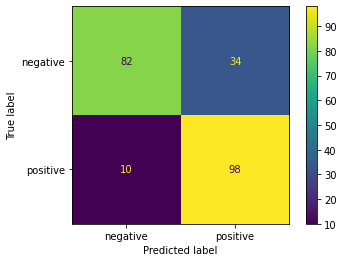

Recall:  0.907
F-1:  0.817
Accuracy:  0.804


In [ ]:
# Building the model 
rbfclassifier = SVC(kernel='rbf', gamma = 1, C=10)
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

# making prediction
y_pred = rbfclassifier.predict(X_test)
#Evaluating the model
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'positive'])

plt.show()

recall = round(metrics.recall_score(y_test, y_pred), 3)
f1 = round(metrics.f1_score(y_test, y_pred), 3)
accuracy = round(metrics.accuracy_score(y_test, y_pred), 3)

accuracies.append(('SVM rbf kernel after tuning hyperparams: ', {
    'Recall': recall,
    'F-1': f1,
    'Accuracy': accuracy
}))
print('Recall: ', recall)
print('F-1: ', f1)
print('Accuracy: ', accuracy)

In [ ]:
for accuracy in accuracies:
  print(accuracy[0])
  print(accuracy[1])
  print('')

First random forest: 
{'Recall': 0.889, 'F-1': 0.865, 'Accuracy': 0.866}

Random forest after tuning: 
{'Recall': 0.889, 'F-1': 0.869, 'Accuracy': 0.871}

First gradient boosting classifier(gbc): 
{'Recall': 0.87, 'F-1': 0.843, 'Accuracy': 0.844}

Gbc after tuning hyperparams: 
{'Recall': 0.907, 'F-1': 0.863, 'Accuracy': 0.862}

Gbc after tuning hyperparams, using select features: 
{'Recall': 0.926, 'F-1': 0.847, 'Accuracy': 0.839}

SVM Linear kernel 1: 
{'Recall': 0.861, 'F-1': 0.861, 'Accuracy': 0.866}

SVM linear kernel after tuning hyperparams: 
{'Recall': 0.861, 'F-1': 0.861, 'Accuracy': 0.866}

SVM polynomial kernel 1: 
{'Recall': 0.685, 'F-1': 0.755, 'Accuracy': 0.786}

SVM polynomial kernel after tuning hyperparams: 
{'Recall': 0.806, 'F-1': 0.829, 'Accuracy': 0.839}

SVM sigmoid kernel 1: 
{'Recall': 0.843, 'F-1': 0.843, 'Accuracy': 0.848}

SVM sigmoid kernel after tuning hyperparams: 
{'Recall': 0.843, 'F-1': 0.858, 'Accuracy': 0.866}

SVM rbf kernel 1: 
{'Recall': 0.87, 'F-1

After tuning, recall using rbf kernel improves from 0.87 to 0.907, which is the best among the SVM models. However, this score is still lower than the 0.926 with gradient boosting.

## 4.KNN Approach

In [ ]:
accuracies2 = []

In [ ]:
#separating features and target
y = df_encoded['heartdisease']


X = df_encoded.drop(columns='heartdisease')

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


#X column names
x_cols = df.drop(columns='heartdisease').columns

#scaling the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

[[98 18]
 [18 90]]


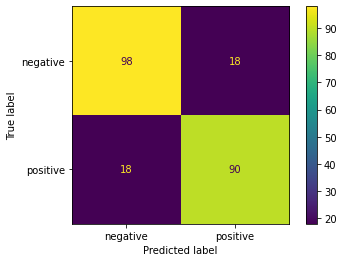

Recall:  0.833
F-1:  0.833
Accuracy:  0.839


In [ ]:
# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#evaluating the model
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'positive'])

plt.show()

recall = round(metrics.recall_score(y_test, y_pred), 3)
f1 = round(metrics.f1_score(y_test, y_pred), 3)
accuracy = round(metrics.accuracy_score(y_test, y_pred), 3)

accuracies2.append(('First knn: ', {
    'Recall': recall,
    'F-1': f1,
    'Accuracy': accuracy
}))
print('Recall: ', recall)
print('F-1: ', f1)
print('Accuracy: ', accuracy)


Recall of 0.833 still lower than best identified so far (0.926-gradient boosting)

In [ ]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_neighbors': np.arange(3, 15, 2),
              'metric': ['minkowski', 'euclidean','manhattan']}

knn = KNeighborsClassifier()
#finding values
search = GridSearchCV(estimator=knn,param_grid=parameters,scoring='recall')
search.fit(X_train,y_train)
print(search.best_params_)

{'metric': 'manhattan', 'n_neighbors': 9}


[[100  16]
 [ 15  93]]


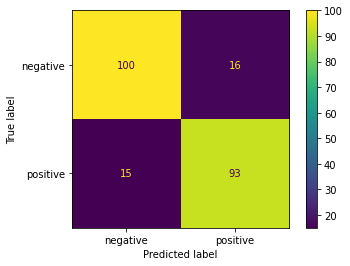

Recall:  0.861
F-1:  0.857
Accuracy:  0.862


In [ ]:
# Training and Predictions

classifier = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#evaluating the model
print(metrics.confusion_matrix(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'positive'])

plt.show()

recall = round(metrics.recall_score(y_test, y_pred), 3)
f1 = round(metrics.f1_score(y_test, y_pred), 3)
accuracy = round(metrics.accuracy_score(y_test, y_pred), 3)

accuracies2.append(('knn after tuning hyperparams: ', {
    'Recall': recall,
    'F-1': f1,
    'Accuracy': accuracy
}))
print('Recall: ', recall)
print('F-1: ', f1)
print('Accuracy: ', accuracy)

In [ ]:
for accuracy in accuracies2:
  print(accuracy[0])
  print(accuracy[1])
  print('')

First knn: 
{'Recall': 0.833, 'F-1': 0.833, 'Accuracy': 0.839}

knn after tuning hyperparams: 
{'Recall': 0.861, 'F-1': 0.857, 'Accuracy': 0.862}



After tuning, the knn performs better than before tuning across all metrics, with recall rising from 0.833 to 0.861. This is however still lower than best identified - 0.926 recall gradient boosting.

## 5.Logistic regression Approach

In [ ]:
accuracieslog=[]

In [ ]:
#separating features and target
y = df_encoded['heartdisease']


X = df_encoded.drop(columns='heartdisease')

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


#X column names
x_cols = df.drop(columns='heartdisease').columns


In [ ]:
from sklearn.linear_model import LogisticRegression


#scaling the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#fitting logistic regression model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

#predicting class
y_pred = LogReg.predict(X_test)

recall = round(metrics.recall_score(y_test, y_pred), 3)
f1 = round(metrics.f1_score(y_test, y_pred), 3)
accuracy = round(metrics.accuracy_score(y_test, y_pred), 3)
accuracieslog.append(('first logistic reg model: ', {
    'Recall': recall,
    'F-1': f1,
    'Accuracy': accuracy
}))

print('Recall: ', recall)
print('F-1: ', f1)
print('Accuracy: ', accuracy)

Recall:  0.861
F-1:  0.861
Accuracy:  0.866


Recall of 0.86 still lower than best identified - gradient boosting recall 0.926

In [ ]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'C': [0.001,0.01,0.1,1,10,100]}
lreg = LogisticRegression()
#finding values
search = GridSearchCV(estimator=lreg,param_grid=parameters,scoring='recall')
search.fit(X_train,y_train)
print(search.best_params_)

{'C': 1}


C parameter value obtained by grid search is equivalent to the default used in the first logistic regression model so the results will be the same - Recall:  0.861, F-1:  0.861,Accuracy:  0.866. 


In [ ]:
#feature selection

#in gradient boosting, feature importances were identified,
#and the top 3 were chestpaintype, st slope and exercise angina.
#testing building a logistic regression model with these features only 

# Split the independent and dependent variables

y = df_encoded['heartdisease'].values

#selecting top 3 most important features
X = df_encoded[['st_slope', 'chestpaintype', 'exerciseangina']].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#scaling the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#fitting logistic regression model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

#predicting class
y_pred = LogReg.predict(X_test)

recall = round(metrics.recall_score(y_test, y_pred), 3)
f1 = round(metrics.f1_score(y_test, y_pred), 3)
accuracy = round(metrics.accuracy_score(y_test, y_pred), 3)

accuracieslog.append(('logistic reg model with select features: ', {
    'Recall': recall,
    'F-1': f1,
    'Accuracy': accuracy
}))

print('Recall: ', recall)
print('F-1: ', f1)
print('Accuracy: ', accuracy)

Recall:  0.87
F-1:  0.847
Accuracy:  0.848


In [ ]:
for accuracy in accuracieslog:
  print(accuracy[0])
  print(accuracy[1])
  print('')

first logistic reg model: 
{'Recall': 0.861, 'F-1': 0.861, 'Accuracy': 0.866}

logistic reg model with select features: 
{'Recall': 0.87, 'F-1': 0.847, 'Accuracy': 0.848}



using select features, recall improves slightly. This recall(0.87) is still lower than current benchmark (0.926-gradient boosting)

## 6.Modelling Summary

**MODELLING SUMMARY**

Our task was to build a model able to detect the presence of heart disease in an individual. In such a problem, prioritizing minimising the number of false negatives is more important than false positives, because the consequences of a false negative are more dire (eg death/worse prognosis). Therefore, in looking at the different evaluation metrics eg recall, accuracy etc, recall was the most important metric to optimize (higher the recall, lower the number of false negatives).

The models tested and optimised were built applying 5 types of classifiers:
* Random forests
* Gradient boosting classifier
* Support vector machines
* K-Nearest-Neighbors 
* Logistic regressors 

**1.Random forests**

* The first random forest model built had a recall of 0.889.
* After tuning the hyperparameter values, the model created had metrics such as f-1 and accuracy improve but recall which is our primary metric remained the same: 0.889 

**2.Gradient boosting classifier**
* The first gradient boosting classifier had a recall of 0.87.
* After tuning the hyperparameter values, the mode created had its recall improve to 0.907, which was higher than random forest’s 0.889. 
* Feature importances were then determined using the gradient boosting classifier above giving a recall of 0.907. The top 3 most important features in determining whether an individual would have heart disease or not were identified to be st_slope, chestpaintype and exerciseangina, in that order.
* A gradient boosting classifier using the tuned hyperparameters and training on the top 3 features identified above was then built. This model had a recall of 0.926, the best identified so far.

**3.SVM**

a) Linear kernel:

* First linear kernel model had a recall of  0.861. 
* After tuning hyperparameters the next model still didn’t improve. This recall was lower than the benchmark: 0.926 by gradient boosting.

b) Polynomial kernel:
* First polynomial kernel model had a recall of 0.685 which is quite low.
* After tuning hyperparameters, the next polynomial kernel model had a better recall of 0.806. However, this recall was lower than the benchmark: 0.926 by gradient boosting.

c) Sigmoid kernel:
* First sigmoid kernel model had recall of 0.843. 
* After tuning hyperparameters, the next model had the same recall even though other metrics eg f1 improved. However, this recall was lower than the benchmark: 0.926 by gradient boosting.

d) Radial Basis Function kernel:
* First rbf model had a recall of 0.87.
* After tuning hyperparameters, the next model’s recall improved to 0.907. However, this recall was lower than the benchmark: 0.926 by gradient boosting.

**4.KNN**
* First knn model had a recall of 0.833
* After tuning hyperparameters, next knn model had a better recall of 0.861. However, this recall was lower than the benchmark: 0.926 by gradient boosting.

**5.Logistic regression**
* First logistic regression model had a recall of 0.861.
* Next model was built with select features (the top 3 most important identified earlier  by gradient boosting-st_slope, chestpaintype, exerciseangina). This model had a better recall of 0.870. However, this recall was still lower than the benchmark: 0.926 by gradient boosting.

**Therefore, out of the various models evaluated, none outperformed the recall (0.926) of the gradient boosting classifier with these hyperparameters —n_estimators 300, learning_rate 0.01, max_depth 2— and trained on st_slope, chestpaintype and exerciseangina.**


In [ ]:
#scores for all models tested
lists = [accuracies, accuracies2, accuracieslog]

for y in lists:
  for x in y:
    print(x[0])
    print(x[1])
    print('')

First random forest: 
{'Recall': 0.889, 'F-1': 0.865, 'Accuracy': 0.866}

Random forest after tuning: 
{'Recall': 0.889, 'F-1': 0.869, 'Accuracy': 0.871}

First gradient boosting classifier(gbc): 
{'Recall': 0.87, 'F-1': 0.843, 'Accuracy': 0.844}

Gbc after tuning hyperparams: 
{'Recall': 0.907, 'F-1': 0.863, 'Accuracy': 0.862}

Gbc after tuning hyperparams, using select features: 
{'Recall': 0.926, 'F-1': 0.847, 'Accuracy': 0.839}

SVM Linear kernel 1: 
{'Recall': 0.861, 'F-1': 0.861, 'Accuracy': 0.866}

SVM linear kernel after tuning hyperparams: 
{'Recall': 0.861, 'F-1': 0.861, 'Accuracy': 0.866}

SVM polynomial kernel 1: 
{'Recall': 0.685, 'F-1': 0.755, 'Accuracy': 0.786}

SVM polynomial kernel after tuning hyperparams: 
{'Recall': 0.806, 'F-1': 0.829, 'Accuracy': 0.839}

SVM sigmoid kernel 1: 
{'Recall': 0.843, 'F-1': 0.843, 'Accuracy': 0.848}

SVM sigmoid kernel after tuning hyperparams: 
{'Recall': 0.843, 'F-1': 0.858, 'Accuracy': 0.866}

SVM rbf kernel 1: 
{'Recall': 0.87, 'F-1

# **CONCLUSION AND RECOMMENDATIONS**

## Conclusion

The dataset was loaded and understood, cleaned, then univariate analysis, bivariate analysis and modelling carried out.

The 11 clinical features in our dataset included - age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, resting ecg (electrocardiogram) results, maximum heart rate, exercise-induced angina, old peak and ST_slope.
Heart disease was the target column.

During modelling, the different models tested and optimized were based on 5 types of classifiers:
* Random forests
* Gradient boosting classifier
* Support vector machines
* K-Nearest-Neighbors 
* Logistic regressors 

Given that the primary task was detecting the presence of heart disease, recall of the positive class was the most important metric to optimize because minimizing the number of false negatives is essential. The top 3 most important features in determining whether an individual would have heart disease were identified to be st_slope, chestpaintype and exerciseangina, in that order (using gradient boosting classifier’s feature importances attribute). After testing a variety of models (more detailed summary on modelling under the ‘modelling summary’ section), no model outperformed the recall (0.926) of the gradient boosting classifier with these hyperparameters: n_estimators 300, learning_rate 0.01, max_depth 2, that was trained on the top 3 features: st_slope, chestpaintype and exerciseangina.

Highlighting the bivariate analysis results for the top 3 features in detecting heart disease: 

1. ST_slope:
* Majority of those whose ST slope during peak exercise either sloped down or was flat had heart disease.
2. Chest pain type:
* The majority of those with 'asymptomatic' had heart disease.
3. Exercise Angina:
* Majority of those who experienced exercise-induced angina had heart disease.


## Recommendations

>Based on the analysis carried out, we would recommend that the predictive model to be used for the task of classifying an individual as having heart disease or not be a gradient boosting classifier with the following specifications (this model had the highest recall when evaluated on our dataset - 0.926):
* n_estimators: 300
* learning_rate: 0.01
* max_depth: 2
* Trained on these 3 features - st_slope, chestpaintype, exerciseangina 

>Additionally, since during modelling the top 3 features were identified to be st_slope, chestpaintype, and exercise-induced angina, we recommend that relevant clinical tests for obtaining the values of these particular features for an individual be prioritised when evaluating a patient for heart disease in clinical centres, reducing test-related costs.  Bivariate analysis revealed that most individuals in our dataset whose ST slope during peak exercise either sloped down or was flat, had asymptomatic chest pain, and experienced exercise-induced angina had heart disease.

>After the 3 above, the feature that took 4th place in terms of importance was determined to be sex. Bivariate analysis revealed that in our dataset, most males had heart disease while most females did not have heart disease. Men generally develop CVD at a younger age and have a higher risk of coronary heart disease (CHD) than women ([bmj global health](https://gh.bmj.com/content/2/2/e000298)). This phenomenon has had many theories proposed as to why it is the case such as biological and behavioral factors ([pubmed](https://pubmed.ncbi.nlm.nih.gov/10863872/)). Behavioral risk factors for cardiovascular disease are somewhat controllable. Examples include excessive alcohol consumption and smoking ([who](https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds))), behaviours more common in men which may play a role in the difference (worldbank [here](https://blogs.worldbank.org/opendata/men-smoke-5-times-more-women) and [here](https://elibrary.worldbank.org/doi/abs/10.1596/0-8213-5125-7)). We recommend that individuals attempt to minimize these behaviors to aid in reducing their overall risk for developing cardiovascular disease.
